# Covid Population Worldwide daily data.

Data Source: https://www.kaggle.com/josephassaker/covid19-global-dataset?select=worldometer_coronavirus_daily_data.csv

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("datasets/ml/covid/worldometer_coronavirus_daily_data.csv")
df.dtypes

date                        object
country                     object
cumulative_total_cases     float64
daily_new_cases            float64
active_cases               float64
cumulative_total_deaths    float64
daily_new_deaths           float64
dtype: object

In [4]:
df["date"] = pd.to_datetime(df["date"])

In [5]:
df.dtypes

date                       datetime64[ns]
country                            object
cumulative_total_cases            float64
daily_new_cases                   float64
active_cases                      float64
cumulative_total_deaths           float64
daily_new_deaths                  float64
dtype: object

In [6]:
covid_us = df[(df["country"] == "USA") & (df["date"] >= "2020-3-11") & (df["date"] < "2021-3-11")].reset_index().drop("index", axis = 1)

In [7]:
covid_us

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-03-11,USA,1301.0,307.0,1248.0,38.0,8.0
1,2020-03-12,USA,2475.0,1174.0,2424.0,42.0,4.0
2,2020-03-13,USA,3224.0,749.0,3165.0,49.0,7.0
3,2020-03-14,USA,4026.0,802.0,3918.0,58.0,9.0
4,2020-03-15,USA,5072.0,1046.0,4936.0,75.0,17.0
...,...,...,...,...,...,...,...
360,2021-03-06,USA,29727256.0,60430.0,7331017.0,548973.0,1608.0
361,2021-03-07,USA,29770954.0,43698.0,7298282.0,549813.0,840.0
362,2021-03-08,USA,29815162.0,44208.0,7226193.0,550681.0,868.0
363,2021-03-09,USA,29871284.0,56122.0,7178319.0,552019.0,1338.0


In [8]:
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

Text(0.5, 1.0, 'Covid-19 Cases over time')

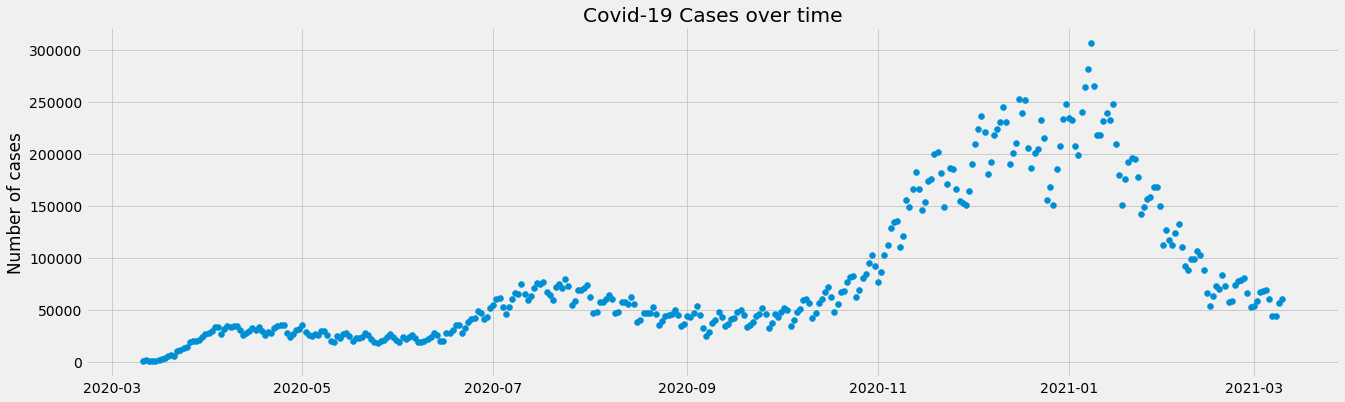

In [9]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(covid_us["date"], covid_us["daily_new_cases"])
plt.ylabel("Number of cases")
plt.title("Covid-19 Cases over time")

Text(0.5, 1.0, 'Death due to Covid-19 over time')

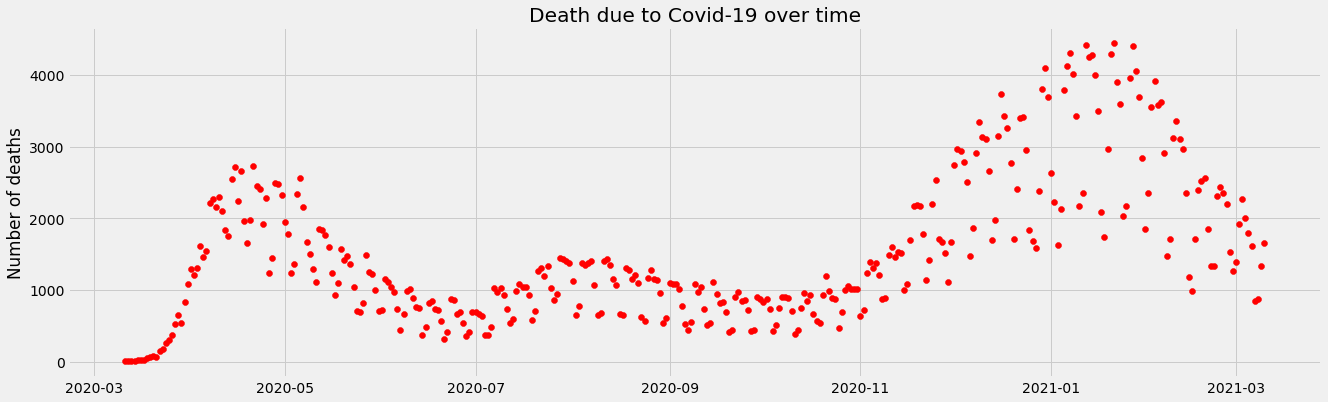

In [10]:
plt.rcParams["figure.figsize"] = (20,6)
plt.scatter(covid_us["date"], covid_us["daily_new_deaths"], color = "r")
plt.ylabel("Number of deaths")
plt.title("Death due to Covid-19 over time")

In [11]:
s5health = pd.read_csv("datasets/sp500indexand11sectors/S5HLTH INDEX.csv")
s5health["Date"] = pd.to_datetime(s5health["Date"])
s5health.head()

,Date,Open,High,Low,Close
0,2020-03-12,1059.56,1059.56,983.76,985.40
1,2020-03-13,985.49,1054.24,977.05,1053.92
2,2020-03-16,1053.63,1053.63,946.45,948.61
3,2020-03-17,948.61,1015.04,948.61,1007.95
4,2020-03-18,1007.95,1007.95,927.76,973.71


In [12]:
covid_sp500health_merge = covid_us.merge(s5health[['Close','Date']], how="inner", left_on = "date", right_on = "Date")

In [13]:
# Close is for SP500Healthcare index
covid_sp500health_merge

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,Close,Date
0,2020-03-12,USA,2475.0,1174.0,2424.0,42.0,4.0,985.40,2020-03-12
1,2020-03-13,USA,3224.0,749.0,3165.0,49.0,7.0,1053.92,2020-03-13
2,2020-03-16,USA,6408.0,1336.0,6236.0,96.0,21.0,948.61,2020-03-16
3,2020-03-17,USA,8850.0,2442.0,8621.0,121.0,25.0,1007.95,2020-03-17
4,2020-03-18,USA,12588.0,3738.0,12305.0,173.0,52.0,973.71,2020-03-18
...,...,...,...,...,...,...,...,...,...
246,2021-03-04,USA,29597417.0,68134.0,7402482.0,545565.0,1998.0,1289.06,2021-03-04
247,2021-03-05,USA,29666826.0,69409.0,7375158.0,547365.0,1800.0,1315.14,2021-03-05
248,2021-03-08,USA,29815162.0,44208.0,7226193.0,550681.0,868.0,1311.39,2021-03-08
249,2021-03-09,USA,29871284.0,56122.0,7178319.0,552019.0,1338.0,1319.47,2021-03-09


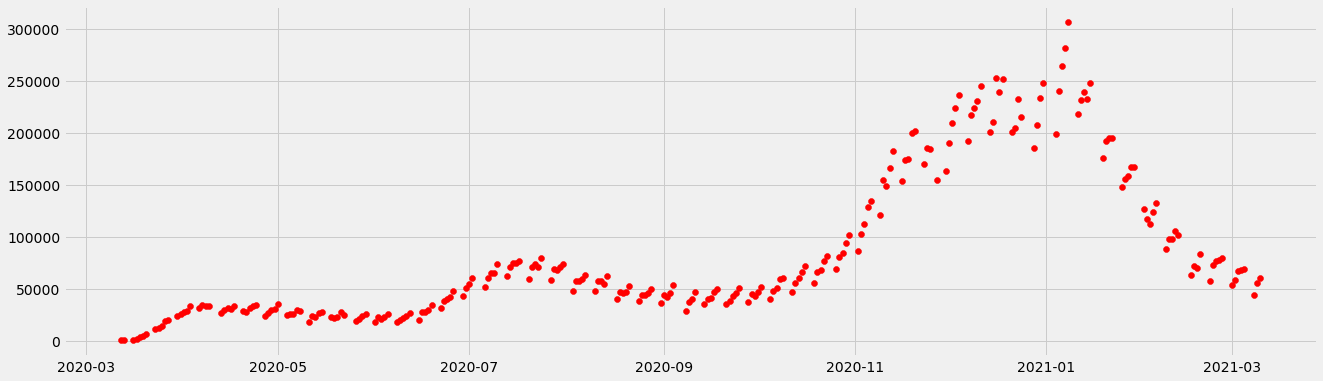

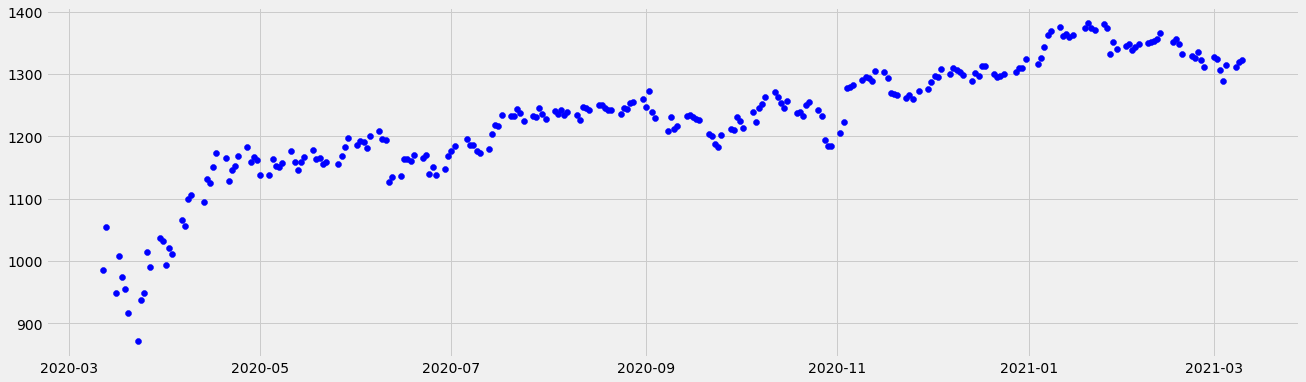

In [14]:
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["daily_new_cases"], color = "r")
plt.show()
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["Close"], color = "b")
plt.show()

<AxesSubplot:xlabel='date'>

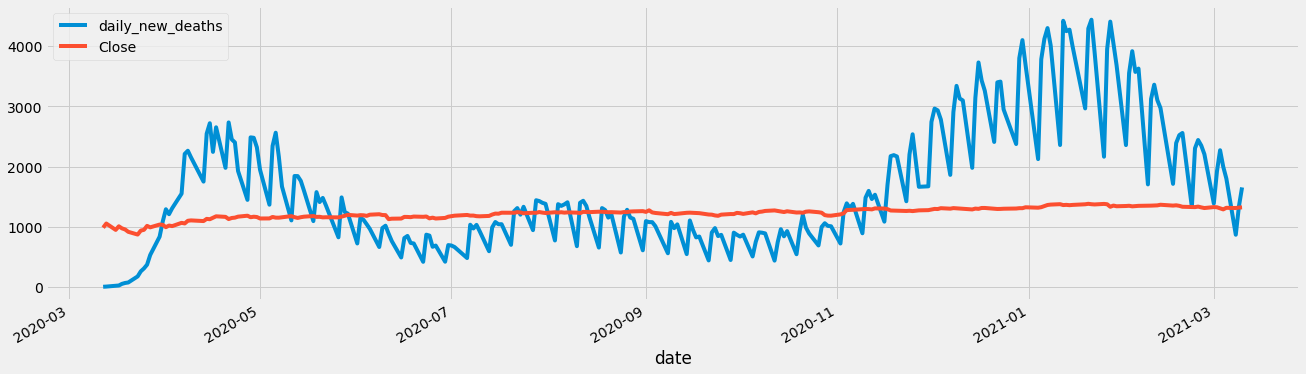

In [15]:
plt.rcParams["figure.figsize"] = (20,6)
covid_sp500health_merge[["date","daily_new_deaths","Close"]].set_index("date").plot()

Text(0.5, 1.0, 'Covid-death vs SP500Healthcare overtime')

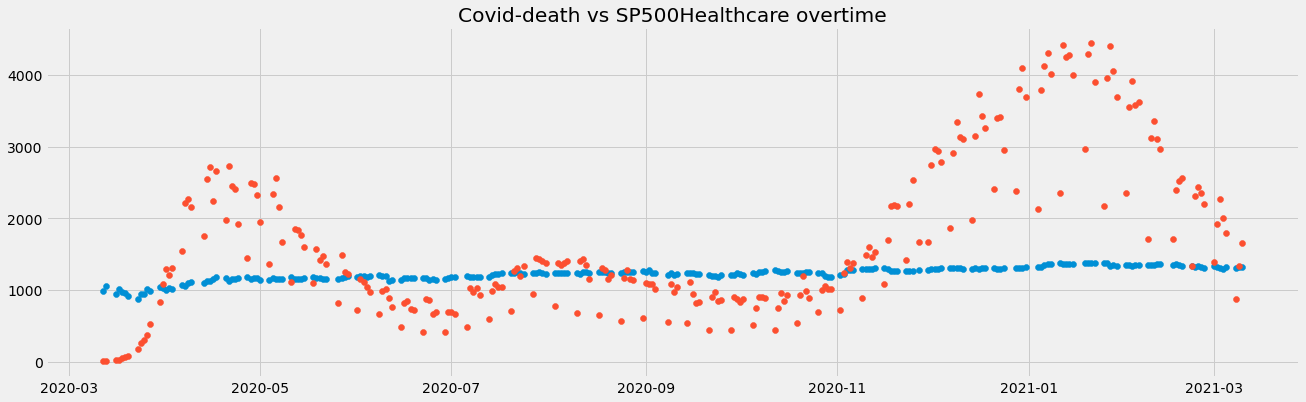

In [16]:
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["Close"])
plt.scatter(covid_sp500health_merge["date"], covid_sp500health_merge["daily_new_deaths"])
plt.title("Covid-death vs SP500Healthcare overtime")

In [17]:
covid_sp500health_merge

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths,Close,Date
0,2020-03-12,USA,2475.0,1174.0,2424.0,42.0,4.0,985.40,2020-03-12
1,2020-03-13,USA,3224.0,749.0,3165.0,49.0,7.0,1053.92,2020-03-13
2,2020-03-16,USA,6408.0,1336.0,6236.0,96.0,21.0,948.61,2020-03-16
3,2020-03-17,USA,8850.0,2442.0,8621.0,121.0,25.0,1007.95,2020-03-17
4,2020-03-18,USA,12588.0,3738.0,12305.0,173.0,52.0,973.71,2020-03-18
...,...,...,...,...,...,...,...,...,...
246,2021-03-04,USA,29597417.0,68134.0,7402482.0,545565.0,1998.0,1289.06,2021-03-04
247,2021-03-05,USA,29666826.0,69409.0,7375158.0,547365.0,1800.0,1315.14,2021-03-05
248,2021-03-08,USA,29815162.0,44208.0,7226193.0,550681.0,868.0,1311.39,2021-03-08
249,2021-03-09,USA,29871284.0,56122.0,7178319.0,552019.0,1338.0,1319.47,2021-03-09


In [24]:
#statistics
print(covid_sp500health_merge.describe())

       cumulative_total_cases  daily_new_cases  active_cases  \
count            2.510000e+02       251.000000  2.510000e+02   
mean             9.890236e+06     83964.816733  3.398984e+06   
std              9.418684e+06     70786.552627  2.821270e+06   
min              2.475000e+03       749.000000  2.424000e+03   
25%              2.111498e+06     32795.500000  1.108117e+06   
50%              6.703412e+06     57335.000000  2.386316e+06   
75%              1.565274e+07    112403.000000  5.862212e+06   
max              2.993174e+07    306271.000000  8.953136e+06   

       cumulative_total_deaths  daily_new_deaths        Close  
count               251.000000        251.000000   251.000000  
mean             223117.852590       1659.394422  1225.886574  
std              150263.285481       1066.529392    95.886540  
min                  42.000000          4.000000   870.990000  
25%              119137.000000        897.000000  1172.380000  
50%              200358.000000       13

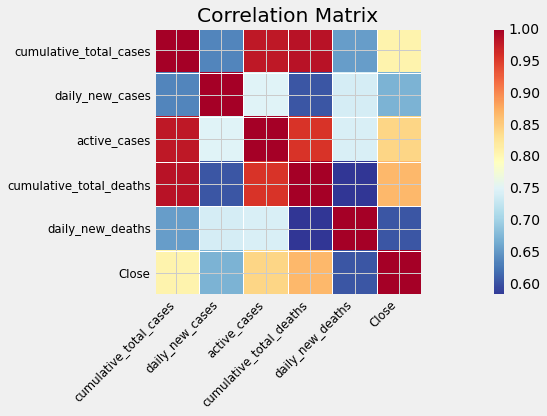

In [23]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
#calculate correlation
correlation = covid_sp500health_merge.corr()
#plot correlation
sm.graphics.plot_corr(correlation,xnames=list(correlation.columns))
plt.show()